In [2]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

# Assignment #1 - Basic Data Exploration in Python

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Peer Evaluation

This assignemnt will have a peer evaluation for the grade - you'll each read some other notebooks and evaluate their answers. The reason for this is not (entirely) my personal laziness, we are hoping to accomplish a couple of things:
<ul>
<li> Quick experience reading notebooks. One of the important skills we need to have is the ability to read examples that we find and adapting it to our scenario. This is practice with data you're now comfortable with.
<li> Critically evaluating what makes sense in a data notebook. You know how you attempted to explain your look at the data, how did other people do it? What was better? What was worse?
<li> Design is subjective. This will give you a set of opinions that are not mine. You will end up with plenty of feedback of what I think, feadback of others early-on should hopefully help you make things appealing to all and not tailored to me. 
</ul>
Doing this right up front will hopefully help kickstart some of that expericence. 

### Grading

The detailed grading is defined in the marking guide in the Moodle workshop. Note that there's points both for getting a correct answer and for presenting it in a way that makes sense. 

## Structure

Each section contains a set of questions/prompts and a rough framework for your responses. You can change the structure around, just make sure it is readable. What I have there is just a loose guide to help get you started, you're not bound to it. 

## Load Data

Load the labor data into a dataframe. You probably don't want to change this section. 

In [3]:
#Load/preview data
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [4]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


## Part 1 - Age

<ol>
<li> Make and plot a Hist and Pmf for age.
<li> What fraction of the people in the data are 51? What fraction are older than 51?
<li> What is the median age? 
<li> Does the distribution of the sample data seem to mirror the working age population?
</ol>

#### Make and plot a Hist and Pmf for age.

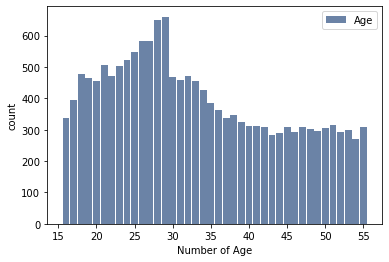

In [5]:
age=df['Age']
hist = thinkstats2.Hist(round(df["Age"],1), label='Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of Age', ylabel='count')


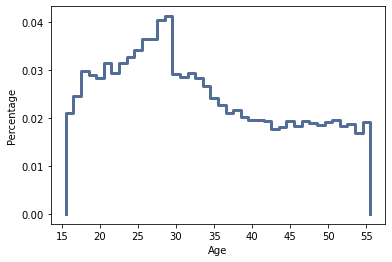

<Figure size 576x432 with 0 Axes>

In [6]:
agepmf= thinkstats2.Pmf(age)
thinkplot.Pmfs([agepmf])
thinkplot.Show(xlabel="Age", ylabel = "Percentage")


#### What fraction of the people in the data are 51? What fraction are older than 51?

In [7]:
age51up = age.loc[lambda x : x > 51]
age50up = age.loc[lambda x : x > 50]

print('There are', age50up. count() - age51up.count() , "people 51 years old.")

There are 314 people 51 years old.


In [8]:
age51up = age.loc[lambda x : x > 51]
print('There are', age51up.count(), "people over 51 years old.")

There are 1171 people over 51 years old.


##### What is the median age?

In [9]:
print("Age Median: ", np.median(age))

Age Median:  31.0


##### Does the distribution of the sample data seem to mirror the working age population?

In [10]:
age=df['Age']
age.describe()


count    15992.000000
mean        33.225238
std         11.045216
min         16.000000
25%         24.000000
50%         31.000000
75%         42.000000
max         55.000000
Name: Age, dtype: float64

Yes, the distribution of the sample data seems to mirror the working-age population because 15992 people are ages between the ages of 16 and 55 in the database, and such a large population sample is persuasive.

### Part 2 - Demographics

<ul>
<li>Consider some of the demographic features: 
    <ul>
    <li>Education
    <li>Race
    <li>Hisp
    <li>MaritalStatus
    <li>Nodeg. 
    </ul>
</ul>
<ol>
<li>This data came from the United States, does it appear to be a representative sample of the US population?
<li>Demonstrate this in some way in your code. 
</ol>

##### Exploring the data...

#1 This data came from the United States, does it appear to be a representative sample of the US population?

Yes, it does. "A representative sample is a subset of a population that seeks to accurately reflect the characteristics of the larger group." It will be manifested in several aspects of demographic features, which are Age, Education, Race, Hisp, Marital status, and Nodeg.

Age

In [31]:
df["Age"].value_counts().sort_index()

16    338
17    395
18    476
19    465
20    454
21    505
22    470
23    503
24    523
25    547
26    583
27    584
28    649
29    660
30    467
31    458
32    470
33    454
34    426
35    386
36    363
37    336
38    346
39    323
40    312
41    312
42    309
43    284
44    290
45    310
46    293
47    310
48    303
49    297
50    306
51    314
52    294
53    300
54    270
55    307
Name: Age, dtype: int64

In [11]:
age=df['Age']
age.describe()

count    15992.000000
mean        33.225238
std         11.045216
min         16.000000
25%         24.000000
50%         31.000000
75%         42.000000
max         55.000000
Name: Age, dtype: float64

In the "Age" data shown above, we can find the age range is from 16 years old to 55 years old, so the large "age" span of the population is a typical representative sample. 

Education

In [12]:
df["Eduacation"].value_counts().sort_index()

HighSchool            6252
Intermediate          2708
LessThanHighSchool    4731
PostGraduate           934
graduate              1367
Name: Eduacation, dtype: int64

The "Education" data shown above, covers the various educational stages of the U.S. population, so the large "Education" span of the population is a typical representative sample. 

Race, and Hisp

In [40]:
df[["Race"]].value_counts().sort_index()

Race    
NotBlack    14816
black        1176
dtype: int64

In [41]:
df[['Hisp']].value_counts().sort_index()

Hisp       
NotHispanic    14840
hispanic        1152
dtype: int64

In [13]:
df[["Race",'Hisp']].value_counts().sort_index()

Race      Hisp       
NotBlack  NotHispanic    13664
          hispanic        1152
black     NotHispanic     1176
dtype: int64

The "Race" and"Hisp" data shown above, cover "Notblack"", and "black" people. In the data of "NotBlack" people, Divided into "NotHispanic" and "Hispanic", on the other side, "Black" people are "NotHispanic" people. So the large The "Race" and"Hisp" data of the population is a typical representative sample. 

MaritalStatus

In [39]:
df['MaritalStatus'].value_counts().sort_index()

Married       11382
NotMarried     4610
Name: MaritalStatus, dtype: int64

In the 'MaritalStatus' data shown above, there are 11382 people "Married", and 4610 people are "notMarried". So here is enough data from the population to become a typical representative sample.

Nodeg

In [15]:
df['Nodeg'] = df['Nodeg']. astype(bool)
df['Nodeg'].value_counts().sort_index()

False    11261
True      4731
Name: Nodeg, dtype: int64

##### Demographic Conclusion


### Part 3 - Earnings

<ol>
<li>Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.
    <ul>
    <li>What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?
    </ul>
<li>Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 
    <ul>
    <li>What could you investigate further in an attempt to explain this?
    </ul>
<li>Plot a histogram and PMF, and compute useful descriptive statistics (think: average...) for the 1978 earnings value. Use the "Cohorts" code from the quiz to break the data into cohorts, plotting each group (either on one chart, or separately, whichever makes the most sense for examining the data - state specifically why you chose 1 vs many charts.
    <ul>
    <li>What is the difference in median income between the groups?
    <li>Theorize a reason for the difference between the groups that could be explained with more data. Briefly describe the data you'd need. This does not need to be something you have data for, or know how to solve right now - just one well founded hypothesis on what might explain the difference.
    </ul>
<li>Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. 
    <ul>
    <li>What can you infer from the presence of outliers that may impact analysis of this data.
    </ul>
</ol>

##### Plot Earnings Data

In [16]:
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [17]:
earnings_1974=df['Earnings_1974']
earnings_1975=df['Earnings_1975']
earnings_1978=df['Earnings_1978']
earnings_1974.describe()

count    15992.000000
mean     14016.800304
std       9569.795893
min          0.000000
25%       4403.452250
50%      15123.580000
75%      23584.180000
max      25862.320000
Name: Earnings_1974, dtype: float64

In [18]:
earnings_1975.describe()

count    15992.000000
mean     13650.803376
std       9270.403225
min          0.000000
25%       4398.823000
50%      14557.110000
75%      22923.737500
max      25243.550000
Name: Earnings_1975, dtype: float64

In [19]:
earnings_1978.describe()

count    15992.000000
mean     14846.659673
std       9647.391524
min          0.000000
25%       5669.298000
50%      16421.975000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64

In [20]:
earnings_1974 = earnings_1974[~np.isnan(earnings_1974)]
earnings_1975 = earnings_1975[~np.isnan(earnings_1975)]
earnings_1978 = earnings_1978[~np.isnan(earnings_1978)]

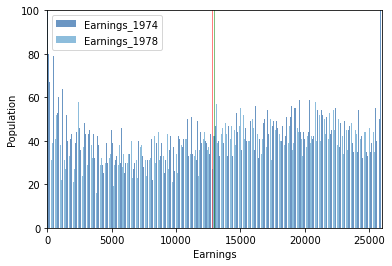

In [67]:
width = 40
thinkplot.PrePlot(2)
earnings_1974hist = thinkstats2.Hist(round(df['Earnings_1974'],-2), label='Earnings_1974')
earnings_1978hist = thinkstats2.Hist(round(df['Earnings_1978'],-2), label='Earnings_1978')
thinkplot.Hist(earnings_1974hist,align="right", width=width)
thinkplot.Hist(earnings_1978hist,align="left", width=width)
thinkplot.Config(xlabel='Earnings', ylabel='Population', xlim=[0,26000], ylim=[0,100])
thinkplot.axvline(np.average(earnings_1974hist), color="green")
thinkplot.axvline(np.average(earnings_1978hist), color="red")


In [22]:
np.average(earnings_1974hist)

13093.340651847811

In [23]:
np.average(earnings_1978hist)

13421.821206682314

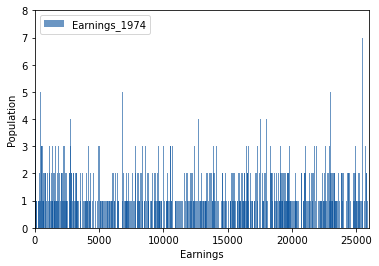

In [24]:
width = 5
thinkplot.PrePlot(2)
earnings_1974hist = thinkstats2.Hist(round(df['Earnings_1974'],0), label='Earnings_1974')
thinkplot.Hist(earnings_1974hist,align="right", width=width)
thinkplot.Config(xlabel='Earnings', ylabel='Population', xlim=[0,26000], ylim=[0,8])

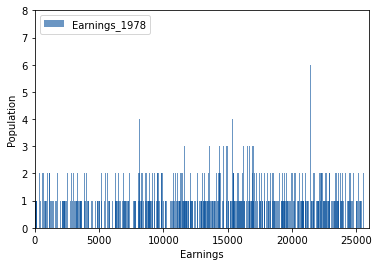

In [25]:
width = 5
thinkplot.PrePlot(2)
earnings_1978hist = thinkstats2.Hist(round(df['Earnings_1978'],0), label='Earnings_1978')
thinkplot.Hist(earnings_1978hist,align="left", width=width)
thinkplot.Config(xlabel='Earnings', ylabel='Population', xlim=[0,26000], ylim=[0,8])

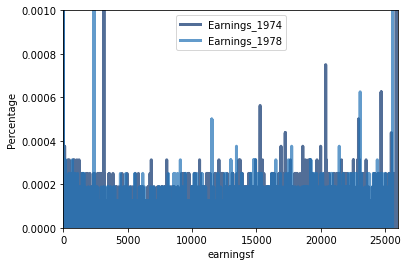

<Figure size 576x432 with 0 Axes>

In [26]:
earnings_1974pmf= thinkstats2.Pmf((earnings_1974), label='Earnings_1974')
earnings_1978pmf= thinkstats2.Pmf((earnings_1978), label='Earnings_1978')
thinkplot.Pmfs([earnings_1974pmf])
thinkplot.Pmfs([earnings_1978pmf])
thinkplot.Show(xlabel="earningsf", ylabel = "Percentage", xlim=[0, 26000], ylim=[0,0.001])

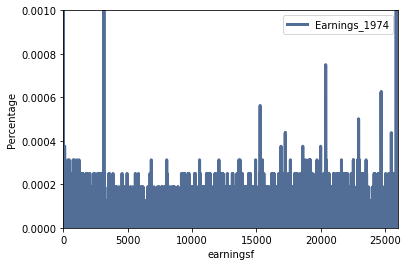

<Figure size 576x432 with 0 Axes>

In [27]:
earnings_1974pmf= thinkstats2.Pmf((earnings_1974), label='Earnings_1974')
thinkplot.Pmfs([earnings_1974pmf])
thinkplot.Show(xlabel="earningsf", ylabel = "Percentage", xlim=[0, 26000], ylim=[0,0.001])

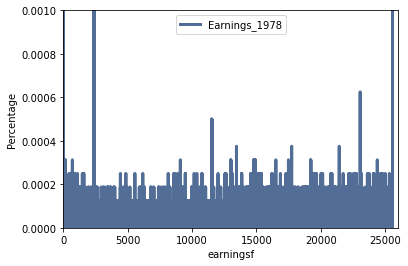

<Figure size 576x432 with 0 Axes>

In [28]:
earnings_1978pmf= thinkstats2.Pmf((earnings_1978), label='Earnings_1978')
thinkplot.Pmfs([earnings_1978pmf])
thinkplot.Show(xlabel="earningsf", ylabel = "Percentage", xlim=[0, 26000], ylim=[0,0.001])

As a conclusion, there seems to be a large jump in the number of people earning near the top end, around $25k. Otherwise the distributions are pretty similar. 

##### What to Investigate Further


##### Histogram and PMF

In [29]:
#Create a hist, pmf, and stats for 1987 Earnings
#Note: if you don't round or otherwise create bins, the thinkstats plots for this will be weird
#That's because there are very few values that are the same, e.g. $14762.34, $15672.86, etc... 
#Every cent is a different value. 
#Seaborn plots will probably look better by default. 

##### Differences in Median Income, and Theory on Why


##### Outliers

##### Outlier Conclusions
